In [1]:
from segment_anything import SamPredictor, sam_model_registry
import cv2
from matplotlib import pyplot as plt

In [2]:
checkpoint = 'checkpoints/sam_vit_l_0b3195.pth'
model_type = 'vit_l'
img_path = 'demo/src/assets/data/dogs.jpg'

(603, 1072, 3)
<class 'numpy.ndarray'>


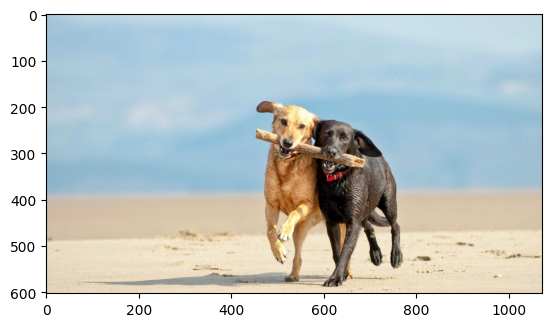

In [14]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
print(type(img))
plt.imshow(img)
plt.show()

In [4]:
sam = sam_model_registry[model_type](checkpoint=checkpoint)
sam = sam.to('cuda')
predictor = SamPredictor(sam)

predictor.set_image(img)

In [5]:
masks, iou_predictions, _ = predictor.predict()

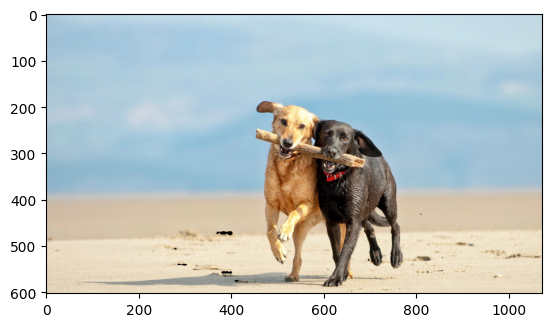

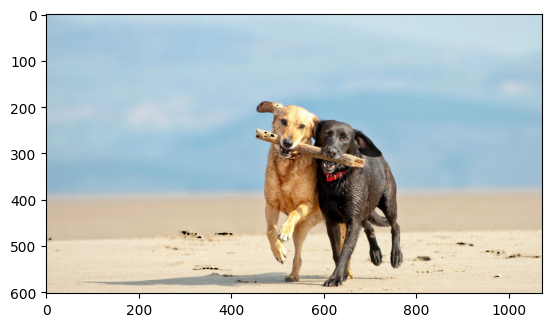

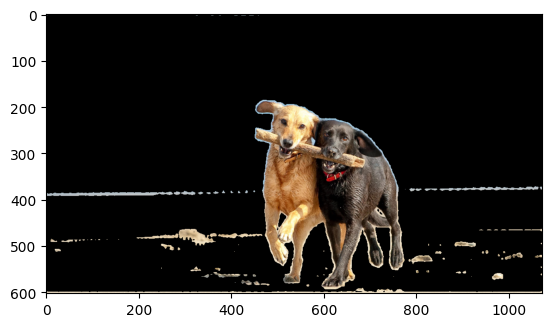

In [6]:
for mask in masks:
    
    plt.imshow(img * (1-mask[:, :, None]))
    plt.show()

In [7]:
print(iou_predictions)

[0.5212476  0.44768173 0.71241724]


# Let's have a look at automatically generating masks for the entire image

In [13]:
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(img)
print(img.shape)
print((len(masks), *masks[0]['segmentation'].shape))
# print(masks)

(603, 1072, 3)
(35, 603, 1072)


In [9]:
print(len(masks))

35


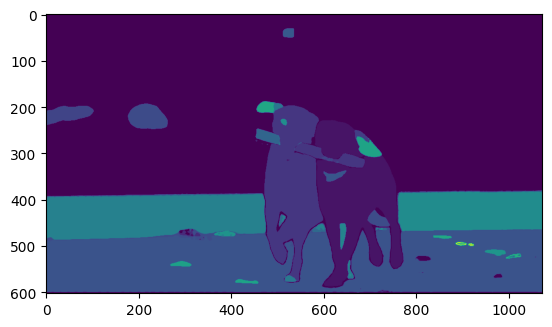

In [10]:
merged_mask = sum([mask['segmentation']*(i*(255-1)/len(masks)+1) for i, mask in enumerate(masks)])
plt.imshow(merged_mask)